In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA  #dimensionality reduction


In [2]:
# Load the data from csv file to a pandas DataFrame
df = pd.read_csv('spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Replace the null values with a null string
mail_data = df.where((pd.notnull(df)), '')

In [5]:
# Label spam mail as 0; ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

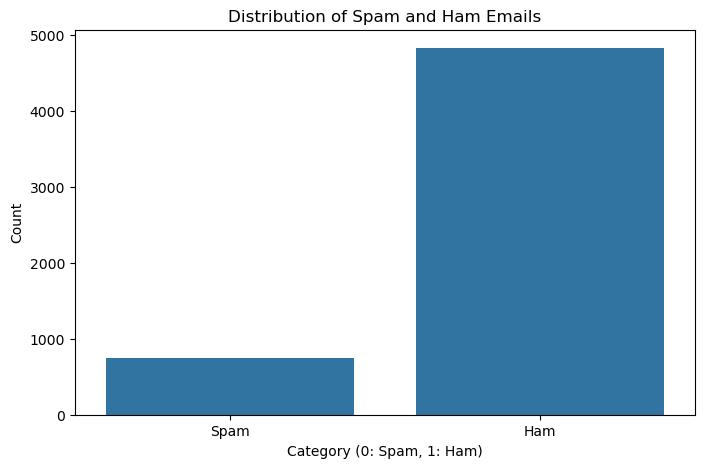

In [6]:
# Visualize the distribution of categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=mail_data)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category (0: Spam, 1: Ham)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'])
plt.show()

In [7]:
# Separating the data as texts and label
X = mail_data['Message']
Y = mail_data['Category']

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


In [9]:
# Transform the text data to feature vectors that can be used as input to the Logistic Regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [10]:
# Convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [11]:
# Train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)

LogisticRegression()

In [12]:
# Prediction on training data
prediction_on_training_data = lr.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.9676912721561588


In [13]:
# Prediction on test data
prediction_on_test_data = lr.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data: ', accuracy_on_test_data)

Accuracy on test data:  0.9668161434977578


In [14]:
from sklearn.metrics import r2_score
r2_score(Y_test , prediction_on_test_data)

0.7227486559139785

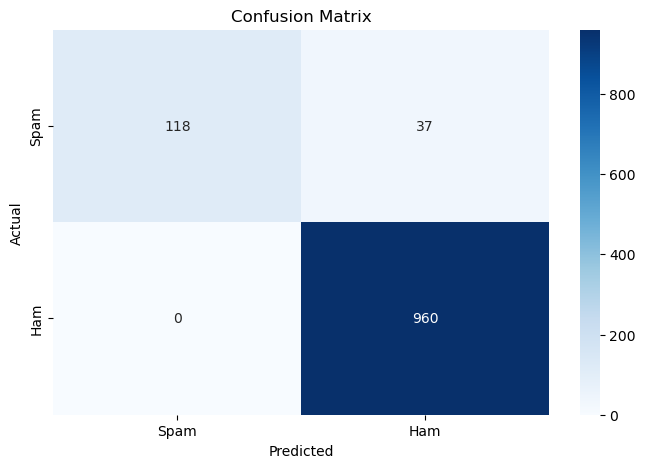

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Dimensionality Reduction for Visualization
# Combine training and test features for PCA
X_combined = np.vstack((X_train_features.toarray(), X_test_features.toarray()))

In [17]:
# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

In [18]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])
pca_df['Category'] = np.concatenate((Y_train.values, Y_test.values))  # Add the category labels

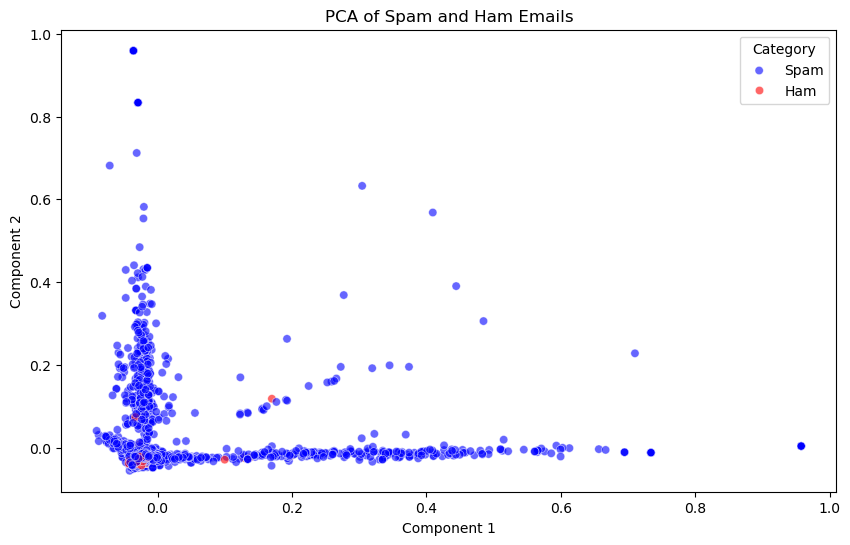

In [19]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Component 1', y='Component 2', hue='Category', palette={0: 'red', 1: 'blue'}, alpha=0.6)
plt.title('PCA of Spam and Ham Emails')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Category', labels=['Spam', 'Ham'])
plt.show()

In [21]:
# Input mail for prediction
input_mail = """Dear Applicant,
We are pleased to offer you a position as a Remote Data Entry Specialist. You can earn up to $5000 a month working from home! 
To get started, please send us your resume and a small processing fee of $100.
Looking forward to your response!
Sincerely,
HR Department


"""

# convert text to feature vectors
input_data_features = feature_extraction.transform([input_mail])

# making prediction

prediction = lr.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Not-spam mail')

else:
  print('Spam mail')

[1]
Not-spam mail
